Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from scipy import stats

datasets

In [94]:
url1='https://github.com/feliphearaujo/spacetitanic_classificationmodels_NeuralNetwork/blob/main/datasets/train.csv?raw=true'
url2='https://github.com/feliphearaujo/spacetitanic_classificationmodels_NeuralNetwork/blob/main/datasets/test.csv?raw=true'

In [95]:
train = pd.read_csv(url1, sep=',')
test = pd.read_csv(url2)

EDA

In [55]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [58]:
y_train.head()

,Transported
0,0
1,1
2,0
3,0
4,1


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


excluindo colunas inúteis

In [96]:
train = train.drop("PassengerId", axis=1)
train = train.drop("Name", axis=1)

In [97]:
test = test.drop("PassengerId", axis=1)
test = test.drop("Name", axis=1)

mostrando respostas

True     4378
False    4315
Name: Transported, dtype: int64
True     50.4%
False    49.6%
Name: Transported, dtype: object


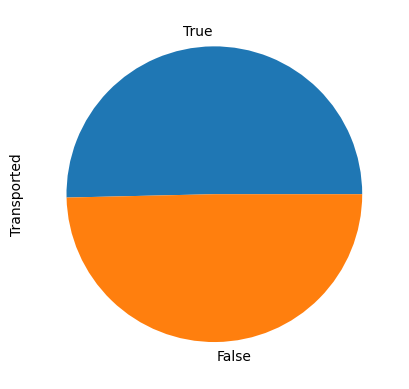

In [98]:
print(train["Transported"].value_counts())
print(train["Transported"].value_counts(normalize=True).map("{:.1%}".format))

#plot the pie chart of education categories
train.Transported.value_counts(normalize=False).plot.pie()
plt.show()

substituindo valores nulos

In [68]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [69]:
test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [99]:
#função que preenche dados ausentes categóricos com a moda

def preencher_com_moda(df, colunas):
    for coluna in colunas:
        moda = stats.mode(df[coluna])[0][0]
        df[coluna].fillna(moda, inplace=True)

In [100]:
#função que preenche dados ausentes com a média


def preencher_com_media(df, colunas):
    for coluna in colunas:
        media = df[coluna].mean()
        df[coluna].fillna(media, inplace=True)

In [101]:
#chamando colunas categoricas do df para preencher valores nulos
dtypes = train.dtypes.to_dict()

for col_name, typ in dtypes.items():
    if (typ == 'object'):
        preencher_com_moda(train,[col_name])
    else:
        preencher_com_media(train,[col_name])

<ipython-input-99-147038306be2>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(df[coluna])[0][0]
<ipython-input-99-147038306be2>:5: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  moda = stats.mode(df[coluna])[0][0]


In [102]:
#chamando colunas categoricas do df para preencher valores nulos
dtypes = test.dtypes.to_dict()

for col_name, typ in dtypes.items():
    if (typ == 'object'):
        preencher_com_moda(test,[col_name])
    else:
        preencher_com_media(test,[col_name])

<ipython-input-99-147038306be2>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(df[coluna])[0][0]
<ipython-input-99-147038306be2>:5: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  moda = stats.mode(df[coluna])[0][0]


In [103]:
train.Cabin.mode()

0    G/734/S
Name: Cabin, dtype: object

In [104]:
train.Cabin.fillna(" G/734/S",inplace=True)

In [105]:
test.Cabin.mode()

0    G/160/P
Name: Cabin, dtype: object

In [77]:
test.Cabin.fillna(" G/160/P",inplace=True)

convertendo dados categóricos em numéricos




In [106]:
train = pd.get_dummies(train, columns=["HomePlanet","Destination"])

In [107]:
test = pd.get_dummies(test, columns=["HomePlanet","Destination"])

In [108]:
dtypes = train.dtypes.to_dict()

for col_name, typ in dtypes.items():
    if (typ == 'bool'):
        print(col_name)

CryoSleep
VIP
Transported


In [109]:
dtypes = test.dtypes.to_dict()

for col_name, typ in dtypes.items():
    if (typ == 'bool'):
        print(col_name)

CryoSleep
VIP


In [110]:
train.Cabin = train.Cabin.astype('category')
train.Cabin = train.Cabin.cat.codes

train.CryoSleep = train.CryoSleep.astype('category')
train.CryoSleep = train.CryoSleep.cat.codes

train.Transported = train.Transported.astype('category')
train.Transported = train.Transported.cat.codes

train.VIP = train.VIP.astype('category')
train.VIP = train.VIP.cat.codes

In [111]:
test.Cabin = test.Cabin.astype('category')
test.Cabin = test.Cabin.cat.codes

test.CryoSleep = test.CryoSleep.astype('category')
test.CryoSleep = test.CryoSleep.cat.codes

test.VIP = test.VIP.astype('category')
test.VIP = test.VIP.cat.codes

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int8   
 1   Cabin                      8693 non-null   int16  
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   int8   
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Transported                8693 non-null   int8   
 10  HomePlanet_Earth           8693 non-null   uint8  
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  Destination_55 Cancri e    8693 non-null   uint8

In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int8   
 1   Cabin                      4277 non-null   int16  
 2   Age                        4277 non-null   float64
 3   VIP                        4277 non-null   int8   
 4   RoomService                4277 non-null   float64
 5   FoodCourt                  4277 non-null   float64
 6   ShoppingMall               4277 non-null   float64
 7   Spa                        4277 non-null   float64
 8   VRDeck                     4277 non-null   float64
 9   HomePlanet_Earth           4277 non-null   uint8  
 10  HomePlanet_Europa          4277 non-null   uint8  
 11  HomePlanet_Mars            4277 non-null   uint8  
 12  Destination_55 Cancri e    4277 non-null   uint8  
 13  Destination_PSO J318.5-22  4277 non-null   uint8

In [114]:

correlation = train.corr()['Transported']

# Exibindo o resultado
print(correlation)

CryoSleep                    0.460132
Cabin                       -0.052685
Age                         -0.074249
VIP                         -0.037261
RoomService                 -0.242048
FoodCourt                    0.046074
ShoppingMall                 0.010019
Spa                         -0.218791
VRDeck                      -0.204825
Transported                  1.000000
HomePlanet_Earth            -0.168845
HomePlanet_Europa            0.176916
HomePlanet_Mars              0.019544
Destination_55 Cancri e      0.108722
Destination_PSO J318.5-22    0.000092
Destination_TRAPPIST-1e     -0.096319
Name: Transported, dtype: float64


In [115]:
X_train = train.copy()
X_train = X_train.drop(['Transported'], axis=1) #remove a variável dependente do X
y_train = train[['Transported']]

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int8   
 1   Cabin                      8693 non-null   int16  
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   int8   
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   HomePlanet_Earth           8693 non-null   uint8  
 10  HomePlanet_Europa          8693 non-null   uint8  
 11  HomePlanet_Mars            8693 non-null   uint8  
 12  Destination_55 Cancri e    8693 non-null   uint8  
 13  Destination_PSO J318.5-22  8693 non-null   uint8

criando o modelo

In [116]:
#importar as bibliotecas e criar a RNA

from keras.models import Sequential
from keras.layers import Dense

#modelagem da RNA

#criar o objeto RNA
ann = Sequential()

In [117]:
#criar a rede neural sequencial
ann = Sequential()

#definir as camadas de entrada, oculta
ann.add( Dense(units = 8, activation = 'relu', kernel_initializer = 'random_uniform', input_dim=15))  #primeira camada oculta (nr_neuronios_entradas + nr_neuronios_saida / 2) = (30+1 / 2 = 16);
                                                                                                       #input_dim = 30  (número de neuronios da camada de entrada = features de X_train)
#definir a camada de saida
ann.add(Dense(units = 1, activation = 'sigmoid'))

#configurar parâmetros da rede
ann.compile(optimizer = 'adam',             #optimizer -> calculo dos ajustes dos pesos (descida do gradiente), calculo do delta
            loss='binary_crossentropy',     #loss -> calculo ou tratamento do erro      (binary_crossentropy -> para problemas de classificação binária)
            metrics = ['binary_accuracy']   #metrics -> avaliar a metrica do modelo ->   accuracy para problema de classificação binária
           )

In [118]:
#treinar a rede neural
ann.fit(X_train, y_train, batch_size = 500, epochs = 500)#roda o banco de dados 500 vezes

Epoch 1/500
18/18 [==============================] - 0s 1ms/step - loss: 15.2324 - binary_accuracy: 0.5024
Epoch 2/500
18/18 [==============================] - 0s 1ms/step - loss: 2.7725 - binary_accuracy: 0.6166
Epoch 3/500
18/18 [==============================] - 0s 1ms/step - loss: 1.3149 - binary_accuracy: 0.6965
Epoch 4/500
18/18 [==============================] - 0s 1ms/step - loss: 0.9692 - binary_accuracy: 0.7238
Epoch 5/500
18/18 [==============================] - 0s 1ms/step - loss: 0.8512 - binary_accuracy: 0.7146
Epoch 6/500
18/18 [==============================] - 0s 1ms/step - loss: 0.7809 - binary_accuracy: 0.7282
Epoch 7/500
18/18 [==============================] - 0s 1ms/step - loss: 0.7168 - binary_accuracy: 0.7397
Epoch 8/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6696 - binary_accuracy: 0.7262
Epoch 9/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6340 - binary_accuracy: 0.7366
Epoch 10/500
18/18 [=========================

testando rede neural

In [122]:
pred_test = ann.predict(test)

134/134 [==============================] - 0s 716us/step


In [123]:
print(pred_test)

[[0.73206425]
 [0.0206297 ]
 [0.9955165 ]
 ...
 [0.98368895]
 [0.9310702 ]
 [0.70296854]]


In [124]:
pred_test_bin = np.where(pred_test > 0.5, 1, 0)

gerando arquivo para submissão

In [125]:
test_submit = pd.DataFrame()

In [126]:
modelo = pd.read_csv(url2)

In [127]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [128]:
modelo.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [129]:
test_submit["PassengerId"] = modelo['PassengerId']
test_submit["Transported"] = pred_test_bin

In [132]:
test_submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [131]:
test_submit['Transported'] = test_submit.Transported.astype(bool)

In [133]:
test_submit.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [134]:
test_submit = test_submit.to_csv('submission_feliphe.csv', index=False)